Q4.  Predicting Shopping Mall Sales. You will have to create a model to predict
revenue. Identify the model with the best params. Target Column -
Revenue. Please note: Visualisation is mandatory. You will receive 0 marks
if you do not add visualisation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from xgboost import XGRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv')

In [3]:
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634


In [4]:
df.shape

(137, 43)

In [5]:
df.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [7]:
df['P6'] = df['P6'].fillna(0)
df['P7'] = df['P7'].fillna(0)

In [8]:
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [9]:
# converting date from object datatype  to dataTime Datatype
df['Open Date']=pd.to_datetime(df['Open Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id          137 non-null    int64         
 1   Open Date   137 non-null    datetime64[ns]
 2   City        137 non-null    object        
 3   City Group  137 non-null    object        
 4   Type        137 non-null    object        
 5   P1          137 non-null    int64         
 6   P2          137 non-null    float64       
 7   P3          137 non-null    float64       
 8   P4          137 non-null    float64       
 9   P5          137 non-null    int64         
 10  P6          137 non-null    float64       
 11  P7          137 non-null    float64       
 12  P8          137 non-null    int64         
 13  P9          137 non-null    int64         
 14  P10         137 non-null    int64         
 15  P11         137 non-null    int64         
 16  P12         137 non-null  

In [11]:
df['Open Date']=df['Open Date'].dt.to_period("M")
monthly_sales=df.groupby('Open Date').sum().reset_index()

<ipython-input-11-7dc8decc2635>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales=df.groupby('Open Date').sum().reset_index()


In [12]:
monthly_sales['Open Date']=monthly_sales['Open Date'].dt.to_timestamp()

In [13]:
monthly_sales.head()

,Open Date,Id,P1,P2,P3,P4,P5,P6,P7,P8,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1996-05-01,35,4,5.0,4.0,3.0,1,2.0,5.0,4,...,2.0,4,1,3,3,3,4,3,3,3903884
1,1997-04-01,122,12,7.5,6.0,7.5,2,8.0,10.0,8,...,2.5,25,15,25,6,18,3,16,6,4286645
2,1998-01-01,28,4,5.0,4.0,4.0,1,3.0,5.0,5,...,2.0,3,5,5,2,3,5,4,4,4705945
3,1998-03-01,112,4,5.0,5.0,4.0,1,5.0,5.0,5,...,3.0,3,2,1,2,2,1,3,3,3784230
4,1998-07-01,64,12,7.5,6.0,6.0,2,8.0,10.0,10,...,7.5,20,15,25,4,24,15,20,6,2551252


In [14]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2008-02,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,2013-03,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2012-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,2009-05,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [15]:
monthly_sales.shape

(84, 40)

In [16]:
df.shape

(137, 43)

Text(0.5, 1.0, 'MONTHLY REVENUE')

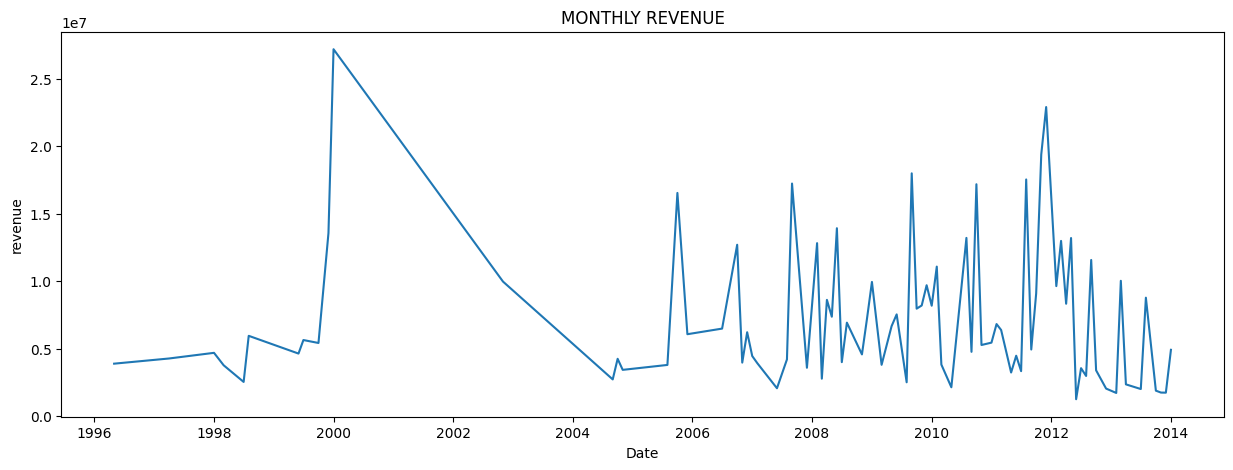

In [17]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['Open Date'],monthly_sales['revenue'])
plt.xlabel('Date')
plt.ylabel('revenue')
plt.title("MONTHLY REVENUE")

In [18]:
monthly_sales['revenue_diff']=monthly_sales['revenue'].diff()
monthly_sales=monthly_sales.dropna()
monthly_sales.head(10)

,Open Date,Id,P1,P2,P3,P4,P5,P6,P7,P8,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,revenue_diff
1,1997-04-01,122,12,7.5,6.0,7.5,2,8.0,10.0,8,...,25,15,25,6,18,3,16,6,4286645,382761.0
2,1998-01-01,28,4,5.0,4.0,4.0,1,3.0,5.0,5,...,3,5,5,2,3,5,4,4,4705945,419300.0
3,1998-03-01,112,4,5.0,5.0,4.0,1,5.0,5.0,5,...,3,2,1,2,2,1,3,3,3784230,-921715.0
4,1998-07-01,64,12,7.5,6.0,6.0,2,8.0,10.0,10,...,20,15,25,4,24,15,20,6,2551252,-1232978.0
5,1998-08-01,83,2,4.0,4.0,4.0,2,5.0,5.0,4,...,5,5,5,3,4,4,5,3,5966193,3414941.0
6,1999-06-01,54,2,4.0,5.0,4.0,1,1.0,3.0,4,...,0,0,0,0,0,0,0,0,4651866,-1314327.0
7,1999-07-01,0,4,5.0,4.0,4.0,2,2.0,5.0,4,...,5,3,4,5,5,4,3,4,5653753,1001887.0
8,1999-10-01,27,4,5.0,4.0,3.0,1,2.0,5.0,4,...,0,0,0,0,0,0,0,0,5435276,-218477.0
9,1999-12-01,99,4,5.0,4.0,4.0,2,4.0,5.0,4,...,5,5,4,2,5,5,5,3,13575224,8139948.0
10,2000-01-01,101,6,10.0,8.0,8.0,4,10.0,10.0,8,...,0,0,0,0,0,0,0,0,27192031,13616807.0


In [19]:
monthly_sales.columns

Index(['Open Date', 'Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue',
       'revenue_diff'],
      dtype='object')

In [20]:
df1=monthly_sales.drop(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],axis=1)

In [21]:
df1.shape

(83, 3)

In [22]:
df1

,Open Date,revenue,revenue_diff
1,1997-04-01,4286645,382761.0
2,1998-01-01,4705945,419300.0
3,1998-03-01,3784230,-921715.0
4,1998-07-01,2551252,-1232978.0
5,1998-08-01,5966193,3414941.0
...,...,...,...
79,2013-08-01,8790987,6765690.0
80,2013-10-01,1904842,-6886145.0
81,2013-11-01,1763231,-141611.0
82,2013-12-01,1756069,-7162.0


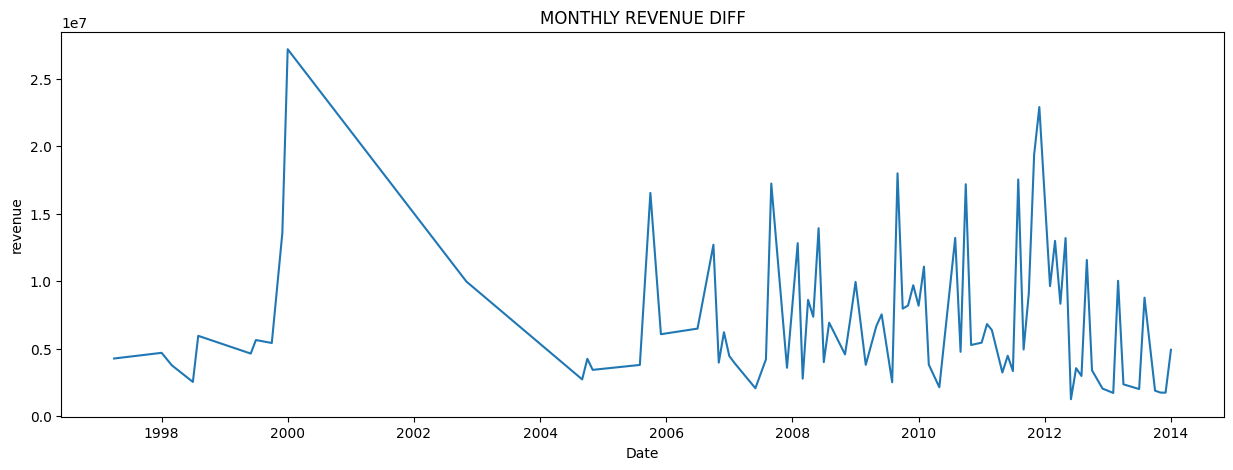

In [23]:
plt.figure(figsize=(15,5))
plt.plot(df1['Open Date'],df1['revenue'])
plt.xlabel('Date')
plt.ylabel('revenue')
plt.title("MONTHLY REVENUE DIFF")
plt.show()

In [24]:
supervised_data=df1.drop(['Open Date','revenue'],axis=1)

In [25]:
for i in range (1,13):
    col_name='month'+str(i)
    supervised_data[col_name]=supervised_data['revenue_diff'].shift(i)
supervised_data=supervised_data.dropna().reset_index(drop=True)
supervised_data.head()

,revenue_diff,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,1526124.0,-7243992.0,-17209987.0,13616807.0,8139948.0,-218477.0,1001887.0,-1314327.0,3414941.0,-1232978.0,-921715.0,419300.0,382761.0
1,-819100.0,1526124.0,-7243992.0,-17209987.0,13616807.0,8139948.0,-218477.0,1001887.0,-1314327.0,3414941.0,-1232978.0,-921715.0,419300.0
2,364931.0,-819100.0,1526124.0,-7243992.0,-17209987.0,13616807.0,8139948.0,-218477.0,1001887.0,-1314327.0,3414941.0,-1232978.0,-921715.0
3,12739057.0,364931.0,-819100.0,1526124.0,-7243992.0,-17209987.0,13616807.0,8139948.0,-218477.0,1001887.0,-1314327.0,3414941.0,-1232978.0
4,-10463661.0,12739057.0,364931.0,-819100.0,1526124.0,-7243992.0,-17209987.0,13616807.0,8139948.0,-218477.0,1001887.0,-1314327.0,3414941.0


In [26]:
train_data=supervised_data[:-12]
test_data=supervised_data[-12:]
print("Train Data Shape",train_data.shape)
print("Test Data Shape",test_data.shape)

Train Data Shape (59, 13)
Test Data Shape (12, 13)


In [27]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)

In [28]:
X_train,y_train=train_data[:,1:],train_data[:,0:1]
X_test,y_test=test_data[:,1:],test_data[:,0:1]
y_train=y_train.ravel()
y_test=y_test.ravel()
print("X_train Shape",X_train.shape)
print("y_train Shape",y_train.shape)
print("X_test Shape",X_test.shape)
print("y_test Shape",y_test.shape)

X_train Shape (59, 12)
y_train Shape (59,)
X_test Shape (12, 12)
y_test Shape (12,)


In [29]:
sales_dates=df1['Open Date'][-12:].reset_index(drop=True)
predict_df=pd.DataFrame(sales_dates)

In [30]:
act_sales =df1['revenue'][-13:].to_list()
print(act_sales)

[2993069, 11583906, 3410878, 2058644, 1734634, 10041180, 2371202, 2025297, 8790987, 1904842, 1763231, 1756069, 4929889]


In [31]:
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)
lr_pre=lr_model.predict(X_test)


In [32]:
lr_pre =lr_pre.reshape(-1,1)
lr_pre_test_set=np.concatenate([lr_pre,X_test],axis=1)
lr_pre_test_set=scaler.inverse_transform(lr_pre_test_set)

In [33]:
result_list=[]
for index in range (0,len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0]+act_sales[index])
lr_pre_series =pd.Series(result_list,name="Linear Prediction")
predict_df=predict_df.merge(lr_pre_series,left_index=True,right_index=True)

In [34]:
print(predict_df)

    Open Date  Linear Prediction
0  2012-09-01       1.024267e+07
1  2012-10-01       1.126401e+07
2  2012-12-01       1.318745e+07
3  2013-02-01       7.827215e+06
4  2013-03-01       1.104925e+07
5  2013-04-01       7.594563e+06
6  2013-07-01       9.313499e+06
7  2013-08-01       3.580442e+06
8  2013-10-01       6.477392e+06
9  2013-11-01       5.248433e+06
10 2013-12-01       5.733381e+06
11 2014-01-01       2.136599e+06


In [35]:
lr_mse=np.sqrt(mean_squared_error(predict_df['Linear Prediction'],df1['revenue'][-12:]))
lr_mae=mean_absolute_error(predict_df['Linear Prediction'],df1['revenue'][-12:])
lr_r2=r2_score(predict_df['Linear Prediction'],df1['revenue'][-12:])
print("Linear regression MSE",lr_mse)
print("Linear regression MAE",lr_mae)
print("Linear regression R2",lr_r2)

Linear regression MSE 5698568.690586201
Linear regression MAE 4997857.121192577
Linear regression R2 -2.1865289717205014


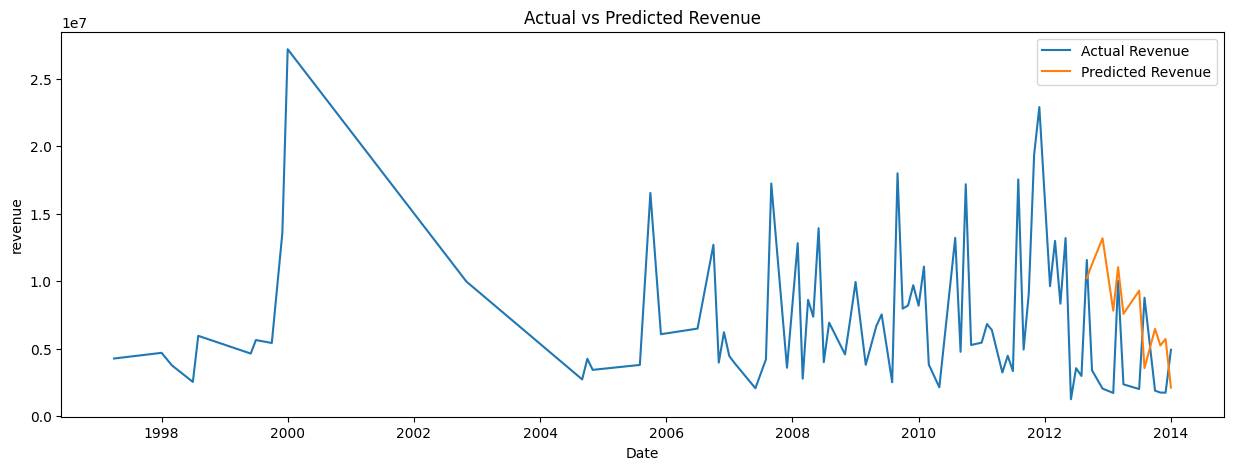

In [36]:
plt.figure(figsize=(15,5))
plt.plot(df1['Open Date'],df1['revenue'])
plt.plot(predict_df['Open Date'], predict_df['Linear Prediction'])
plt.xlabel('Date')
plt.ylabel('revenue')
plt.title("Actual vs Predicted Revenue")
plt.legend(['Actual Revenue','Predicted Revenue'])
plt.show()